In [46]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options 
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup 
import time

In [47]:
df=pd.read_csv('sandiego_output.csv')
df.head()

,addressCity,addressState,area,baths,beds,latitude,longitude,price
0,San Diego,CA,NaN,NaN,NaN,32.943880,-117.237528,NaN
1,SAN DIEGO,CA,3075.0,3.0,5.0,33.004779,-117.115680,"$4,200/mo"
2,San Diego,CA,1454.0,3.0,3.0,32.997999,-117.070160,"$2,750/mo"
3,San Diego,CA,1200.0,2.5,2.0,32.737260,-117.173390,"$4,000/mo"
4,San Diego,CA,900.0,1.5,2.0,32.756715,-117.112220,"$2,150/mo"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addressCity   840 non-null    object 
 1   addressState  840 non-null    object 
 2   area          486 non-null    float64
 3   baths         538 non-null    float64
 4   beds          539 non-null    float64
 5   latitude      840 non-null    float64
 6   longitude     840 non-null    float64
 7   price         539 non-null    object 
dtypes: float64(5), object(3)
memory usage: 52.6+ KB


### data cleaning steps

In [6]:
#check for missing values
#before cleaning: 840 entries
df.isna()

,addressCity,addressState,area,baths,beds,latitude,longitude,price
0,False,False,True,True,True,False,False,True
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
835,False,False,False,False,False,False,False,False
836,False,False,True,True,True,False,False,True
837,False,False,False,False,False,False,False,False
838,False,False,True,True,True,False,False,True


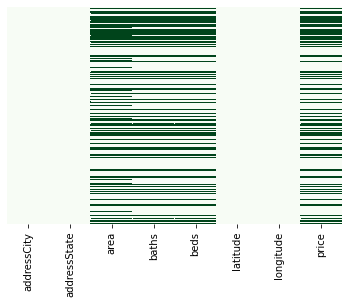

In [7]:
#check for missing values
#same dataset missing: are, baths, beds, price
sns.heatmap(df.isna(), yticklabels=False,cbar=False,cmap='Greens')

In [8]:
df=df.dropna()

In [10]:
df.info()
#after cleaning: 485 entries (more than 40% of the data were dropped)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 1 to 837
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addressCity   485 non-null    object 
 1   addressState  485 non-null    object 
 2   area          485 non-null    float64
 3   baths         485 non-null    float64
 4   beds          485 non-null    float64
 5   latitude      485 non-null    float64
 6   longitude     485 non-null    float64
 7   price         485 non-null    object 
dtypes: float64(5), object(3)
memory usage: 34.1+ KB


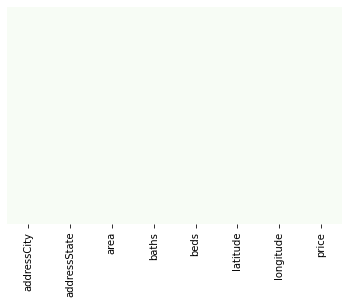

In [12]:
#after dropping missing data we have no non-null values anymore
sns.heatmap(df.isna(), yticklabels=False,cbar=False,cmap='Greens')

In [13]:
#change column name from 'area' to 'area in sqft'
df['area in sqft']= df['area']

In [14]:
df.head()

,addressCity,addressState,area,baths,beds,latitude,longitude,price,area in sqft
1,SAN DIEGO,CA,3075.0,3.0,5.0,33.004779,-117.11568,"$4,200/mo",3075.0
2,San Diego,CA,1454.0,3.0,3.0,32.997999,-117.07016,"$2,750/mo",1454.0
3,San Diego,CA,1200.0,2.5,2.0,32.737260,-117.17339,"$4,000/mo",1200.0
4,San Diego,CA,900.0,1.5,2.0,32.756715,-117.11222,"$2,150/mo",900.0
7,San Diego,CA,839.0,2.0,2.0,32.751067,-117.10532,"$2,100/mo",839.0


In [15]:
#drop the 'addressCity' and 'addressState' column because every entry is related to San Diego and California
df.drop(['addressCity', 'addressState'], axis=1, inplace=True)

In [16]:
df.head()

,area,baths,beds,latitude,longitude,price,area in sqft
1,3075.0,3.0,5.0,33.004779,-117.11568,"$4,200/mo",3075.0
2,1454.0,3.0,3.0,32.997999,-117.07016,"$2,750/mo",1454.0
3,1200.0,2.5,2.0,32.737260,-117.17339,"$4,000/mo",1200.0
4,900.0,1.5,2.0,32.756715,-117.11222,"$2,150/mo",900.0
7,839.0,2.0,2.0,32.751067,-117.10532,"$2,100/mo",839.0


In [17]:
#reset the index since rows were deleted during the dropping missing value process
df=df.reset_index(drop=True)

In [18]:
df.head()

,area,baths,beds,latitude,longitude,price,area in sqft
0,3075.0,3.0,5.0,33.004779,-117.11568,"$4,200/mo",3075.0
1,1454.0,3.0,3.0,32.997999,-117.07016,"$2,750/mo",1454.0
2,1200.0,2.5,2.0,32.737260,-117.17339,"$4,000/mo",1200.0
3,900.0,1.5,2.0,32.756715,-117.11222,"$2,150/mo",900.0
4,839.0,2.0,2.0,32.751067,-117.10532,"$2,100/mo",839.0


In [19]:
#rename column from 'price' to 'monthly price in $'
df['monthly price in $']=df['price']

In [20]:
df.head()

,area,baths,beds,latitude,longitude,price,area in sqft,monthly price in $
0,3075.0,3.0,5.0,33.004779,-117.11568,"$4,200/mo",3075.0,"$4,200/mo"
1,1454.0,3.0,3.0,32.997999,-117.07016,"$2,750/mo",1454.0,"$2,750/mo"
2,1200.0,2.5,2.0,32.737260,-117.17339,"$4,000/mo",1200.0,"$4,000/mo"
3,900.0,1.5,2.0,32.756715,-117.11222,"$2,150/mo",900.0,"$2,150/mo"
4,839.0,2.0,2.0,32.751067,-117.10532,"$2,100/mo",839.0,"$2,100/mo"


In [21]:
# remove entries with '/mo', 'mo', '+' inside the 'monthly price in $' columns

def modify_price(x):
    if '/mo' in x:
        return x.strip('/mo')
    elif '+/mo' in x:
        return x.strip('+/mo')
    elif '+' in x:
        return x.split('+')[0]
    else:
        return x

In [22]:
#apply the 'modify_price' function
df['monthly price in $']=df['monthly price in $'].apply(modify_price)

In [24]:
#modification: remove '$' sign from the 'monthly price in $' entries

def remove_dollar_sign(x):
    for i in x:
        if '$' in x:
            return x.replace('$','')
        else:
            return x

In [26]:
#apply the 'remove_dollar_sign' function
df['monthly price in $']=df['monthly price in $'].apply(remove_dollar_sign)

In [28]:
#check the current dataframe 
df.head()

,area,baths,beds,latitude,longitude,price,area in sqft,monthly price in $
0,3075.0,3.0,5.0,33.004779,-117.11568,"$4,200/mo",3075.0,"4,200"
1,1454.0,3.0,3.0,32.997999,-117.07016,"$2,750/mo",1454.0,"2,750"
2,1200.0,2.5,2.0,32.737260,-117.17339,"$4,000/mo",1200.0,"4,000"
3,900.0,1.5,2.0,32.756715,-117.11222,"$2,150/mo",900.0,"2,150"
4,839.0,2.0,2.0,32.751067,-117.10532,"$2,100/mo",839.0,"2,100"


In [29]:
#drop columns: 'area', 'price' since we renamed them

In [30]:
df.drop(['area', 'price'], axis=1, inplace=True)

In [31]:
#check the current dataframe 
df.head()

,baths,beds,latitude,longitude,area in sqft,monthly price in $
0,3.0,5.0,33.004779,-117.11568,3075.0,"4,200"
1,3.0,3.0,32.997999,-117.07016,1454.0,"2,750"
2,2.5,2.0,32.737260,-117.17339,1200.0,"4,000"
3,1.5,2.0,32.756715,-117.11222,900.0,"2,150"
4,2.0,2.0,32.751067,-117.10532,839.0,"2,100"


In [32]:
#change column order
df=df[['area in sqft', 'baths', 'beds', 'latitude', 'longitude', 'monthly price in $']]

In [33]:
df.head()

,area in sqft,baths,beds,latitude,longitude,monthly price in $
0,3075.0,3.0,5.0,33.004779,-117.11568,"4,200"
1,1454.0,3.0,3.0,32.997999,-117.07016,"2,750"
2,1200.0,2.5,2.0,32.737260,-117.17339,"4,000"
3,900.0,1.5,2.0,32.756715,-117.11222,"2,150"
4,839.0,2.0,2.0,32.751067,-117.10532,"2,100"


In [34]:
# remove the comma inside the 'monthly price in $' column

def remove_comma(x):
    for i in x:
        if ',' in x:
            return x.replace(',','')
        else:
            return x

In [37]:
#apply the 'remove_underscore' function
df['monthly price in $']=df['monthly price in $'].apply(remove_comma)

In [40]:
#convert the 'monthly price in $' column to float
df['monthly price in $']=df['monthly price in $'].astype(float)

In [273]:
#check the dataframe infos- now every column is a float type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area in sqft        485 non-null    float64
 1   baths               485 non-null    float64
 2   beds                485 non-null    float64
 3   latitude            485 non-null    float64
 4   longitude           485 non-null    float64
 5   monthly price in $  485 non-null    float64
dtypes: float64(6)
memory usage: 22.9 KB


In [42]:
#check the modified dataframe 
df.head()

,area in sqft,baths,beds,latitude,longitude,monthly price in $
0,3075.0,3.0,5.0,33.004779,-117.11568,4200.0
1,1454.0,3.0,3.0,32.997999,-117.07016,2750.0
2,1200.0,2.5,2.0,32.737260,-117.17339,4000.0
3,900.0,1.5,2.0,32.756715,-117.11222,2150.0
4,839.0,2.0,2.0,32.751067,-117.10532,2100.0


In [ ]:
#save as csv file
df.to_csv('Zillow_cleaned_data.csv')